## Homework #5. Exploratory Data Analysis
#### Author: `ANHELINA BABII`
##### I marked the questions I will use for my final project with +. Some of them will be combined because they are connected.

In [1]:
import pandas as pd
import time
import datetime
import regex
import io
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import string
import plotly.express as px
from collections import Counter
from collections import namedtuple

In [2]:
df = pd.read_csv(r'C:\Users\westc\Desktop\uni2\css\hw4\data\merged_data\dialogs_data_all.csv')

C:\Users\westc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 0. I was checking if it works

In [4]:
df.head(10)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
0,896,2022-02-22 13:10:49+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,text,NaN,-1001121077046
1,895,2022-02-22 13:10:41+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,​​Твоя тривога має місце бути.\n\nМи справді н...,photo,NaN,-1001121077046
2,894,2022-02-21 15:50:55+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046
3,893,2022-02-14 13:10:05+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,"​​​​Можливо, ти сьогодні пішов на пари чи робо...",photo,NaN,-1001121077046
4,892,2022-02-14 10:30:06+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046
5,891,2022-02-12 14:00:04+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,​​Маєш пару на 14-те?\n\nЧи ти та сама людинка...,photo,NaN,-1001121077046
6,890,2022-02-10 10:00:04+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,"​​​​Любов варта всього, пам'ятаєш же?\n\nМи ві...",photo,NaN,-1001121077046
7,889,2022-02-07 12:00:19+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046
8,888,2022-02-03 10:00:10+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,"​​Могилянка — твоя, моя, наша спільна — повсяк...",photo,NaN,-1001121077046
9,887,2022-01-31 07:01:01+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046


In [5]:
df.keys()

Index(['id', 'date', 'from_id', 'to_id', 'fwd_from', 'message', 'type',
       'duration', 'dialog_id'],
      dtype='object')

In [6]:
df['from_id'].value_counts().head(10)

PeerUser(user_id=319498185)           440311
PeerUser(user_id=545692949)            40542
PeerUser(user_id=658352983)            17129
PeerUser(user_id=633201121)            16218
PeerUser(user_id=682652074)            14929
PeerUser(user_id=510268944)            14292
PeerUser(user_id=573090274)            12850
PeerUser(user_id=419467462)            11611
PeerUser(user_id=387335969)            11307
PeerChannel(channel_id=1457226601)     11239
Name: from_id, dtype: int64

### 1. Top-10 most used words. + (i will improve it)

In [90]:
text = df[(df["type"]=="text")]
text_dict = text[["message","from_id"]]
x = text_dict.applymap(str)

wcounter = Counter(" ".join(x["message"]).lower().split())
words = pd.DataFrame.from_dict(wcounter, orient="index").reset_index()
words.columns.values[1] = "num"
words = words.sort_values(by="num", ascending=False)

words.head(12)

,index,num
1468,я,120129
3,не,105344
73,в,83022
147,а,59760
16,на,58696
93,і,43368
347,ну,40072
407,так,37455
8350,и,36901
203,що,31007


In [74]:
freq = ['я', 'не', 'в', 'а', 'на', 'і', 'ну', 'так', 'и', 'що', 'у', 'це', 'i', 'что', 'з', 'все', 'там', 'это', 'то', 
        'але', 'за', 'to', 'та', 'да', 'просто', 'and', 'як', 'с', 'ти', 'ты', 'мене', 'the', 'по', 'до', 'как', 'you', 
        'но', 'мені', 'меня', 'a', 'her', 'мне', 'ща', 'вже', 'ми', 'про', 'він', 'вона', 'нас', 'ж', 'тебе', 'ще', 'шо', 
        '—', '-', 'он', 'бо', 'якщо', 'она', '+', 'буде', 'же', 'о', '=', 'є', 'для', 'that', 'тут', 'she', 'of', 'уже', 
        'my', 'it', 'если', 'ні', 'nan', 'мы', 'чи', 'будет', 'so', 'in', 'нет', 'вот', '}', 'is', '{', 'for', 'через',
        'коли', 'but', 'теж', 'от', 'б', 'було', 'was', 'есть', 'am', 'me', 'дуже']
freq = pd.DataFrame(freq, columns = ['index']) 
new = pd.concat([words,freq], axis=0, ignore_index=True).drop_duplicates(subset=['index'],keep=False, ignore_index=True)
n = new.applymap(str)
n.head(12)

,index,num
0,бля,7373.0
1,ору,6557.0
2,завтра,6505.0
3,см,6490.0
4,треба,6332.0
5,хочу,6248.0
6,типу,6128.0
7,2,5978.0
8,зараз,5960.0
9,хз,5907.0


In [75]:
toptendf = words.head(10)

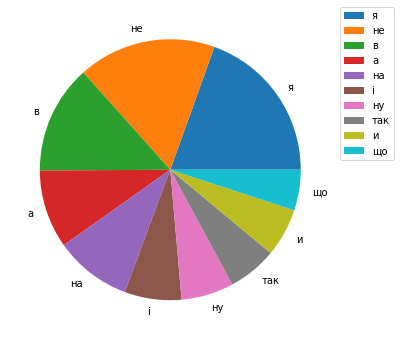

In [128]:
plot = toptendf.plot.pie(y = 'num', labels = toptendf.iloc[:,0], figsize=(6, 6))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.gca().axes.get_yaxis().set_visible(False)

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [78]:
nn = n.head(12)
nn['num'] = nn['num'].astype('double')

C:\Users\westc\AppData\Local\Temp/ipykernel_23608/1145255082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn['num'] = nn['num'].astype('double')


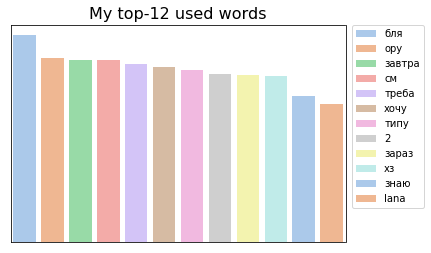

In [126]:
sns.barplot(y="num", x=nn.iloc[:,0], data=nn, hue='index', palette = 'pastel', dodge=False).set_title('My top-12 used words', fontsize=16)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

### 2. Most used types of messages.

1e6 - millions, the most used type is text.

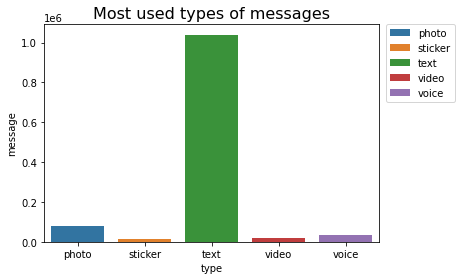

In [28]:
used = df.groupby(['type']).count()
used['type'] = used.index.get_level_values(0)
sns.barplot(y="message", x=used.type, data=used, hue='type', dodge=False).set_title('Most used types of messages', fontsize=16)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### 3. Top-10 most used stickers.

Newer stickers do not show, old ones do (the fonts are installed).

In [100]:
stickers = df[(df["type"]=="sticker")]
## new dataframe with texts
stick = stickers[["message","from_id"]]
x = stick.applymap(str)

scounter = Counter(" ".join(x["message"]).split())
ss = pd.DataFrame.from_dict(scounter, orient="index").reset_index()
ss.columns.values[1] = "count"
ss = ss.sort_values(by="count",ascending=False)

ss = ss.iloc[1:13]
ss

,index,count
31,👍,467
19,😍,296
14,🙂,275
12,😭,262
118,😎,258
102,😘,231
3,🥺,219
68,😳,203
16,❤️,195
22,😏,193


C:\Users\westc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\westc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128578 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\westc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\westc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\westc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\westc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128578 missing fr

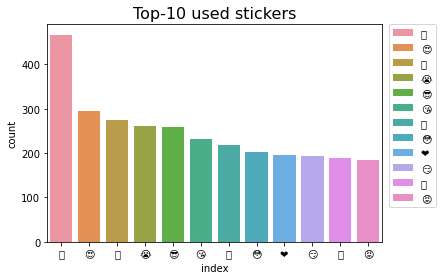

In [166]:
xx = sns.barplot(y="count", x=ss.iloc[:,0], data=ss, hue='index', dodge=False).set_title('Top-10 used stickers', fontsize=16)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show('png')

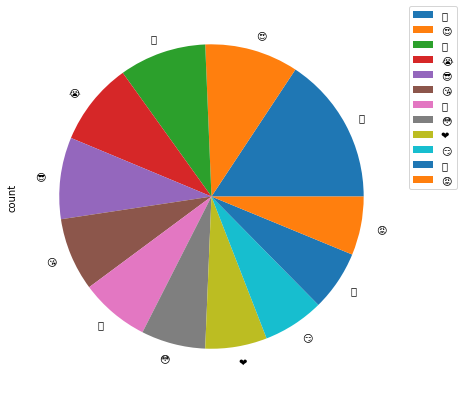

In [167]:
plot = ss.plot.pie(y='count', labels = ss.iloc[:,0], figsize=(7, 7))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### 4. Messages per month

I needed a function to transform time, so i can use this data too. Internet helped me with this transformation.

In [116]:
def transform_time(data):
    data.message = data.message.fillna('')
    data['date'] = data.date.apply(lambda x: pd.to_datetime(x))
    data['year'] = data.date.apply(lambda x: x.year)
    data['month'] = data.date.apply(lambda x: x.month)
    data['day'] = data.date.apply(lambda x: x.day)
    data['hour'] = data.date.apply(lambda x: x.hour)
    data['minute'] = data.date.apply(lambda x: x.minute)
    data['second'] = data.date.apply(lambda x: x.second)
    data = data.set_index('date')
    data.head()
    return data

In [117]:
data = transform_time(df)

In [118]:
data.head(2)

,id,from_id,to_id,fwd_from,message,type,duration,dialog_id,year,month,day,hour,minute,second
date,,,,,,,,,,,,,,
2022-02-22 13:10:49+00:00,896,NaN,PeerChannel(channel_id=1121077046),NaN,,text,NaN,-1001121077046,2022,2,22,13,10,49
2022-02-22 13:10:41+00:00,895,NaN,PeerChannel(channel_id=1121077046),NaN,​​Твоя тривога має місце бути.\n\nМи справді н...,photo,NaN,-1001121077046,2022,2,22,13,10,41


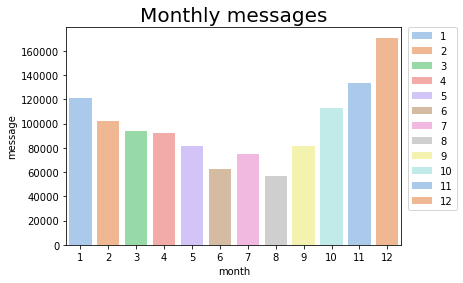

In [125]:
gr = data.groupby(['month']).count()
gr['month'] = gr.index.get_level_values(0)
sns.barplot(y="message", x="month", data=gr, hue='month', palette = 'pastel', dodge=False).set_title('Monthly messages', fontsize=20)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

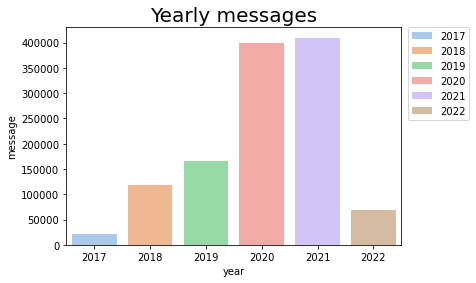

In [124]:
gr = data.groupby(['year']).count()
gr['year'] = gr.index.get_level_values(0)
sns.barplot(y="message", x="year", data=gr, hue='year', palette = 'pastel', dodge=False).set_title('Yearly messages', fontsize=20)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### 5. Most used types of messages in December?

Since December is the month when I communicate the most, I want to have a look at what kind of messages I get.

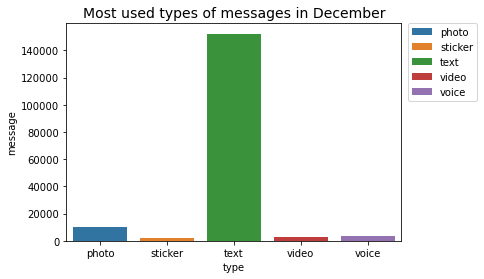

In [70]:
dec = df[(df["month"]==12)]
tdec = dec.groupby(['type']).count()
tdec['type'] = tdec.index.get_level_values(0)
sns.barplot(y="message", x=tdec.type, data=tdec, hue='type', dodge=False).set_title('Most used types of messages in December', fontsize=14)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

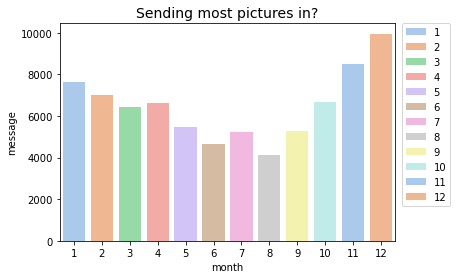

In [133]:
dec = df[(df["type"]=='photo')]
tdec = dec.groupby(['month']).count()
tdec['month'] = tdec.index.get_level_values(0)
sns.barplot(y="message", x=tdec.month, data=tdec, hue='month', palette = 'pastel', dodge=False).set_title('Sending most pictures in?', fontsize=14)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

We can actually check it: the total number of messages in December in previous plot is more than 160k. Here we have around 150k texts, around 10k photos ~ 160k. Plus, the other bits like stickers, videos and voice messages.

### 6. Most active hours?

In [136]:
data['from_id']=data['from_id'].apply(lambda x: str(x))
sent=data[data["from_id"].str.contains("")].copy()

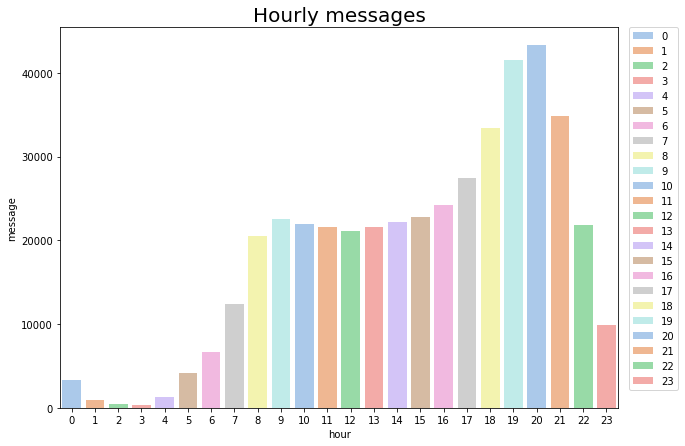

In [138]:
grouped_by_from = sent.groupby(['hour']).count()
grouped_by_from['hour'] = grouped_by_from.index.get_level_values(0)
plt.figure(figsize=(10, 7))
sns.barplot(y="message", x='hour', data=grouped_by_from, hue='hour', palette = 'pastel', dodge=False).set_title('Hourly messages', fontsize=20);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### 7. How much did I swear? +

In [161]:
texts = sent[(sent["type"]=="text")]
fuck = texts.message.str.contains('fuck ').sum()
fucking = texts.message.str.contains('fucking').sum()
damn = texts.message.str.contains('damn').sum()
bitch = texts.message.str.contains('bitch').sum()
hell = texts.message.str.contains('hell').sum()
shit = texts.message.str.contains('shit').sum()

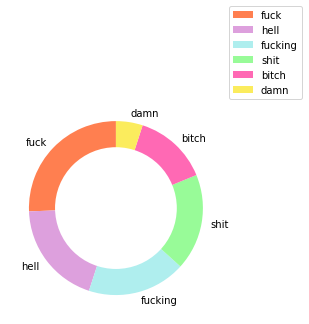

In [164]:
dat = [['fuck', fuck], ['shit', shit], ['bitch', bitch], ['hell', hell], ['damn', damn], ['fucking', fucking]]
swear = pd.DataFrame(dat, columns = ['swear word', 'count'])
swear = swear.sort_values(by = 'count', ascending = False)
ax = swear.plot.pie(y='count', colors = colors, labels=swear.iloc[:,0], startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.legend(bbox_to_anchor=(1.02, 1), loc='lower left', borderaxespad=0)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

In [43]:
swear

,swear word,count
0,fuck,263
1,shit,184
2,bitch,142
3,hell,199
4,damn,51
5,fucking,188


In [115]:
colors = ['#ff7f50','#dda0dd','#afeeee','#98fb98', '#ff69B4', '#FBEC5D']

### 8. When do we swear the most? +

In [150]:
swear1 = pd.DataFrame(data, columns = ['hour', 'message'])
fuck1 = swear1[swear1['message'].str.contains('fuck ')].groupby('hour').count()
shit1 = swear1[swear1['message'].str.contains('shit')].groupby('hour').count()
bitch1 = swear1[swear1['message'].str.contains('bitch')].groupby('hour').count()
hell1 = swear1[swear1['message'].str.contains('hell')].groupby('hour').count()
damn1 = swear1[swear1['message'].str.contains('damn')].groupby('hour').count()
fucking1 = swear1[swear1['message'].str.contains('fucking')].groupby('hour').count()

In [151]:
data1 = [['fuck', fuck1], ['shit', shit1], ['bitch', bitch1], ['hell', hell1], ['damn', damn1], ['fucking', fucking1]]

In [152]:
data1

[['fuck',
        message
  hour         
  0          25
  1           7
  2           5
  4           4
  5           7
  6           1
  8          11
  9          12
  10          5
  11          8
  12         24
  13         10
  14         11
  15         23
  16         16
  17         24
  18         30
  19         32
  20         45
  21         34
  22         44
  23         36],
 ['shit',
        message
  hour         
  0          27
  1           4
  2           1
  4           2
  5           2
  6           2
  7           4
  8           8
  9           3
  10          3
  11          3
  12         17
  13         12
  14         22
  15         15
  16         16
  17         19
  18         32
  19         27
  20         35
  21         45
  22         40
  23         24],
 ['bitch',
        message
  hour         
  0          12
  1           2
  2           7
  3           2
  6           1
  7           1
  8           4
  9           7
  10          2
  11 

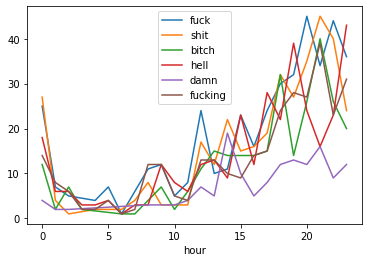

In [159]:
sx = fuck1.plot()
shit1.plot(ax=sx)
bitch1.plot(ax=sx)
hell1.plot(ax=sx)
damn1.plot(ax=sx)
fucking1.plot(ax=sx)
sx.legend(labels = ['fuck', 'shit', 'bitch', 'hell', 'damn', 'fucking'])


At 8 pm.

### 9. How many tiktoks we exchanged? And when? +

In [205]:
df['year'] = df.date.apply(lambda x: x.year)

In [206]:
texts = df[(df["type"]=="text")]
tiktok = texts.message.str.contains('vm.tiktok.com').sum()

In [207]:
tiktok

2070

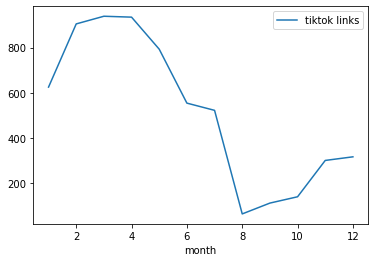

In [208]:
tt = pd.DataFrame(data, columns = ['month', 'message'])
tt = tt[tt['message'].str.contains('vm.tiktok.com')].groupby('month').count()
ax = tt.plot()
ax.legend(labels = ['tiktok links'])

The most links are sent between february and may - right when lockdowns and war happened, so it is pretty logical.

### 10. What links are the most popular: Youtube, Tiktok or Twitter? +

In [69]:
texts = df[(df["type"]=="text")]
tiktok = texts.message.str.contains('vm.tiktok.com').sum()

In [70]:
yt1 = texts.message.str.contains('youtube.com').sum()
yt2 = texts.message.str.contains('youtu.be').sum()
yt = yt1 + yt2

In [71]:
tw = texts.message.str.contains('twitter.com').sum()

In [72]:
socials = [['youtube', yt], ['twitter', tw], ['tiktok', tiktok]]

In [73]:
soc = pd.DataFrame(socials, columns = ['social media', 'num of links'])
soc

,social media,num of links
0,youtube,159
1,twitter,347
2,tiktok,2070


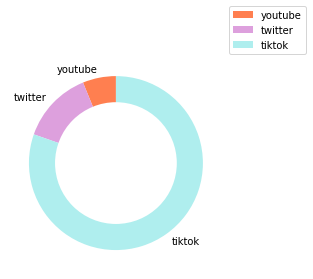

In [103]:
ax = soc.plot.pie(y="num of links", colors = colors, labels=soc.iloc[:,0], startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.legend(bbox_to_anchor=(1.02, 1), loc='lower left', borderaxespad=0)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

### 11. Links I sent vs. links sent to me. (minus the ones in channels and group chats)

In [140]:
stexts = sent[(sent["type"]=="text")]
stiktok = stexts.message.str.contains('vm.tiktok.com').sum()
syt1 = stexts.message.str.contains('youtube.com').sum()
syt2 = stexts.message.str.contains('youtu.be').sum()
syt = syt1 + syt2
stw = stexts.message.str.contains('twitter.com').sum()
ssocials = [['youtube', syt], ['twitter', stw], ['tiktok', stiktok]]
socs = pd.DataFrame(ssocials, columns = ['social media', 'num of SENT links'])
socs

,social media,num of SENT links
0,youtube,73
1,twitter,16
2,tiktok,1260


In [79]:
data['to_id']=data['to_id'].apply(lambda x: str(x))
rec=data[data["to_id"].str.contains("319498185")].copy()

In [81]:
rtexts = rec[(rec["type"]=="text")]
rtiktok = rtexts.message.str.contains('vm.tiktok.com').sum()
ryt1 = rtexts.message.str.contains('youtube.com').sum()
ryt2 = rtexts.message.str.contains('youtu.be').sum()
ryt = ryt1 + ryt2
rtw = rtexts.message.str.contains('twitter.com').sum()
rsocials = [['youtube', ryt], ['twitter', rtw], ['tiktok', rtiktok]]
socr = pd.DataFrame(rsocials, columns = ['social media', 'num of RECEIVED links'])
socr

,social media,num of RECEIVED links
0,youtube,25
1,twitter,79
2,tiktok,562


In [88]:
result = pd.concat([socs, socr.iloc[:,1]], axis=1)

In [89]:
result

,social media,num of SENT links,num of RECEIVED links
0,youtube,73,25
1,twitter,16,79
2,tiktok,1260,562


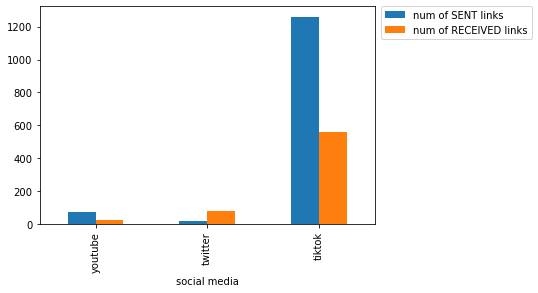

In [97]:
result.plot(x='social media', y=['num of SENT links', 'num of RECEIVED links'], kind="bar")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### 12. My top-5 most and least active days (I sent the messages)

Text(0, 0.5, 'messages count')

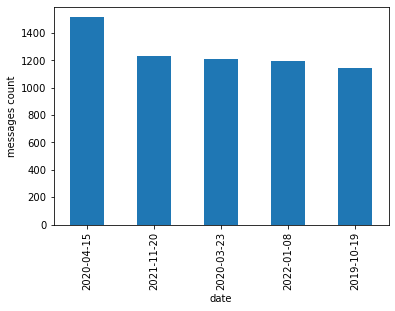

In [100]:
df['from_id']=df['from_id'].apply(lambda x: str(x))
sent1=df[df["from_id"].str.contains("319498185")].copy()
sent1['date'].value_counts().sort_values(ascending=False).head(5).plot.bar()

plt.xlabel('date')
plt.ylabel('messages count')

Text(0, 0.5, 'messages count')

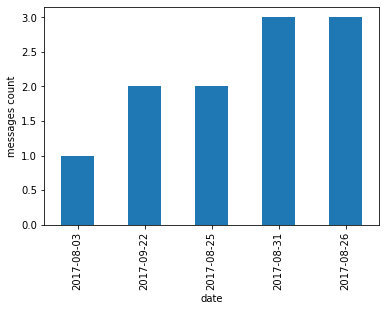

In [98]:
sent1['date'].value_counts().sort_values().head(5).plot.bar()

plt.xlabel('date')
plt.ylabel('messages count')

### 13. Top-10 long messages (have most words) sent by me with dates.

In [144]:
def msg(data):
    data.message = data.message.fillna('')
    data['len'] = data['message'].apply(lambda x: len(x)) ## the length of the message
    data['wcount'] = data['message'].apply(lambda x: len(x.split(' '))) ## word count in a message
    data['wlen'] = data['message'].apply(lambda x: [len(word) for word in x.split(' ')]) ##word length
    data = data.set_index('date')
    data.head()
    return data

In [145]:
data1 = msg(df)

In [128]:
data1.head(2)

,id,from_id,to_id,fwd_from,message,type,duration,dialog_id,month,day,hour,minute,second,year,len,wcount,wlen
date,,,,,,,,,,,,,,,,,
2022-02-22,896,nan,PeerChannel(channel_id=1121077046),NaN,,text,NaN,-1001121077046,2,22,13,10,49,2022,0,1,[0]
2022-02-22,895,nan,PeerChannel(channel_id=1121077046),NaN,​​Твоя тривога має місце бути.\n\nМи справді н...,photo,NaN,-1001121077046,2,22,13,10,41,2022,683,94,"[6, 7, 3, 5, 9, 7, 2, 1, 9, 9, 11, 1, 5, 8, 10..."


In [146]:
data1['from_id']=data1['from_id'].apply(lambda x: str(x))
sent2=data1[data1["from_id"].str.contains("")].copy()

In [147]:
top5wc = sent2[['message', 'wcount']].copy()
top5wc = top5wc.sort_values(by="wcount",ascending=False)

top5wc.head(10)

,message,wcount
date,,
2021-05-28 09:10:08+00:00,boolean b = Faculty.check(s);\n whi...,1795
2021-05-27 22:57:10+00:00,if (students[j].getPib().charAt(0) < min) {\n ...,1627
2021-05-27 22:40:11+00:00,if (students[j].getPib().charAt(0) < min) {\n ...,1627
2021-05-28 09:10:08+00:00,public static void sixthS() {\n int c...,1613
2021-05-28 08:43:44+00:00,public static void sixth() {\n int ch...,1613
2021-05-28 09:58:21+00:00,public static void sixthS() {\n int c...,1613
2021-03-11 00:07:55+00:00,import stanford.karel.*;\n\npublic class Task2...,1603
2021-04-22 19:11:05+00:00,"case 3:\n add(third(bW * 0.625, bH * 1.5,...",1486
2021-05-27 21:02:49+00:00,}\n }\n ...,1468


### 14. Top-10 long "words" used in messages by me.

In [148]:
top5lw = sent2[['message', 'wlen']].copy()
top5lw = top5lw.sort_values(by="wlen",ascending=False)
top5lw.head(10)

,message,wlen
date,,
2021-05-16 20:42:26+00:00,ilyilyilyilyilyilyilyilyilyilyilyilyilyilyilyi...,[4096]
2021-05-16 20:41:56+00:00,ilyilyilyilyilyilyilyilyilyilyilyilyilyilyilyi...,[1728]
2021-05-16 20:42:26+00:00,yilyilyilyilyilyilyilyilyilyilyilyilyilyilyily...,[1087]
2022-02-10 19:35:52+00:00,((((((((((((((((((((((((((((((((((((((((((((((...,[1011]
2022-02-10 19:36:19+00:00,((((((((((((((((((((((((((((((((((((((((((((((...,[1011]
2021-06-10 13:35:06+00:00,https://www.booking.com/hotel/ua/premium-hoste...,[981]
2022-02-07 10:11:26+00:00,https://www.booking.com/hotel/ua/kvartira-podo...,[826]
2021-06-10 14:18:22+00:00,https://www.booking.com/hotel/ua/kryva-lypa.uk...,[796]
2021-06-10 13:42:38+00:00,https://www.booking.com/hotel/ua/kryva-lypa.uk...,[796]


Mostly these are links or "impulsive" messages.

### 15. When do I type the most? Words/per hour in a day. +

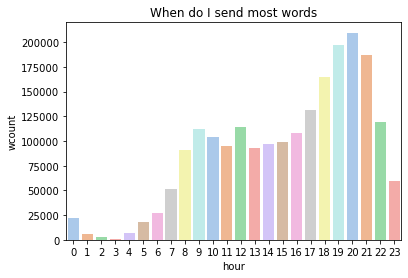

In [149]:
wd = sent2.groupby('hour').sum()
ax = sns.barplot(y='wcount', x=wd.index, palette = 'pastel', data=wd).set_title('When do I send most words');

### 17. How many Happy Birthday's I get and what are the languages?

In [180]:
rt = rec[(rec["type"]=="text")]
hbeng1 = rt.message.str.contains('happy birthday').sum()
hbeng2 = rt.message.str.contains('HAPPY BIRTHDAY').sum()
hbeng = hbeng1 + hbeng2
hbukr1 = rt.message.str.contains('з днем народження').sum()
hbukr2 = rt.message.str.contains('З ДНЕМ НАРОДЖЕННЯ').sum()
hbukr = hbukr1 + hbukr2
hbru1 = rt.message.str.contains('с днем рождения').sum()
hbru2 = rt.message.str.contains('С ДНЕМ РОЖДЕНИЯ').sum()
hbru = hbru1 + hbru2

In [181]:
hb = [['eng', hbeng], ['ukr', hbukr], ['ru', hbru]]

In [183]:
hb = pd.DataFrame(hb, columns=['lang', 'number'])

In [184]:
hb

,lang,number
0,eng,14
1,ukr,5
2,ru,7


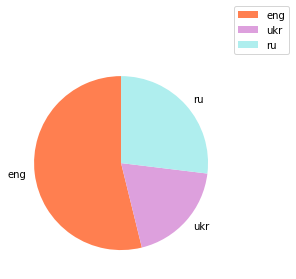

In [188]:
ax = hb.plot.pie(y="number", colors = colors, labels=hb.iloc[:,0], startangle=90, pctdistance=0.85)
ax.legend(bbox_to_anchor=(1.02, 1), loc='lower left', borderaxespad=0)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

### 18. Top-10 most used emojis? +

In [102]:
import emoji
from emoji import UNICODE_EMOJI

In [103]:
def emojis(e):
    return ''.join(c for c in e if c in emoji.UNICODE_EMOJI['en'])

In [204]:
data.message = data.message.fillna('')
data['emoji'] = data.message.apply(lambda x: emojis(x))

In [208]:
emojis_list = list([a for b in data.emoji for a in b])
emojis = Counter(emojis_list)
es = pd.DataFrame.from_dict(emojis, orient="index").reset_index()
es.columns.values[1] = "count"
es = es.sort_values(by="count",ascending=False)

es.head(10)

,index,count
81,😭,40539
137,😂,22828
89,🥺,11399
104,😔,7882
33,❤,7191
106,😳,4531
10,😍,4143
189,🤣,4039
160,🤡,3536
52,👍,3036


In [212]:
toptene = es.head(10)

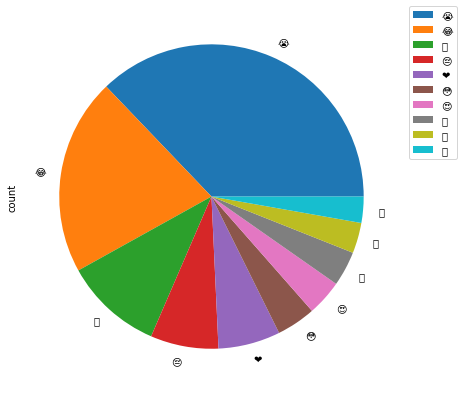

In [216]:
plot = toptene.plot.pie(y='count', labels = toptene.iloc[:,0], figsize=(7, 7))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### 19. Total number of used emojis?

In [219]:
len(es)

986

### 20. Total number of unique words?

In [220]:
len(words)

437162

### 21. Number of sent messages depending on the weekday

In [172]:
df['from_id']=df['from_id'].apply(lambda x: str(x))
sent=df[df["from_id"].str.contains("")].copy()

In [177]:
def f(i):
 l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
 return l[i];

In [195]:
dayd=pd.DataFrame(sent["message"])
dayd['day_of_date'] = sent['date'].dt.weekday
dayd['day_of_date'] = dayd["day_of_date"].apply(f)
dayd["messagecount"] = 1

In [196]:
dayd

,message,day_of_date,messagecount
742,скрін,Sunday,1
743,що хочуть,Sunday,1
744,фу,Sunday,1
750,ці люди навіть не підозрюють що я пиляла у Льв...,Sunday,1
751,ХАХАХАХА,Sunday,1
...,...,...,...
1183015,"добре, дякую🥺",Wednesday,1
1183017,оці типу,Wednesday,1
1183018,,Wednesday,1
1183019,"та наче все ок, але щось туплю на третьому, 3-6",Wednesday,1


In [197]:
day = dayd.groupby("day_of_date").sum()

In [198]:
day

,messagecount
day_of_date,
Friday,61386
Monday,67423
Saturday,61234
Sunday,57530
Thursday,63468
Tuesday,65672
Wednesday,63598


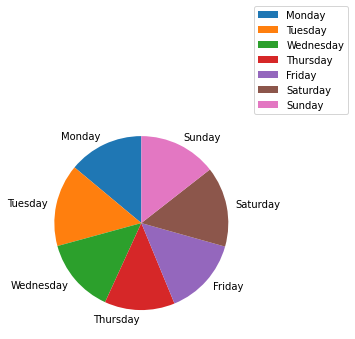

In [212]:
l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day.groupby('messagecount')
ax = day.plot.pie(y="messagecount", labels=l, startangle=90, pctdistance=0.85)
ax.legend(bbox_to_anchor=(1.02, 1), loc='lower left', borderaxespad=0)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

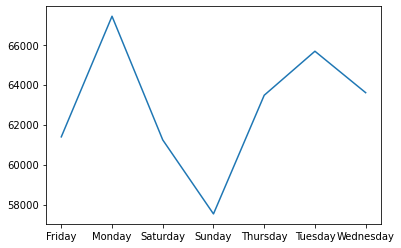

In [213]:
plt.plot(day)

In [179]:
my_range=range(1, len(dayd.index)+1)

In [180]:
my_range

range(1, 440312)

In [194]:
fig = px.scatter_polar(day, r='messagecount', theta='day_of_date')
fig.update_traces()
fig.update_layout(polar=dict(radialaxis=dict(visible=True,)),)
fig.show()